# Import the libraries and the datasets

In [1]:
# Import neccessary librairies
import numpy as np 
import pandas as pd 
import matplotlib 
import matplotlib.pyplot as plt 
import sklearn
import os
import cv2
import pickle

In [2]:
# Import the data (images)
image = []
target_name = []
image_data = []
for root, dirs, files in os.walk("C:\\PythonClass\\Data Science\\Datasets\\Sex_recognition"):
    for folder in dirs:        
        for rot, fold, file in os.walk(root+'\\'+folder):
            for img in file:
                path = root+'\\'+folder+'\\'+img
                target_name.append(os.path.basename(img))
                image.append(path)
                img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                img = cv2.resize(img, (64, 64))
                image_data.append(img)
print(len(target_name))
print(len(image))
print(len(image_data))

200
200
200


# Feature Engineering of the datasets

In [3]:
# Convert the images to np array
face_id = np.array(image_data)
face_id

array([[[215, 215, 214, ..., 208, 207, 201],
        [215, 215, 215, ..., 212, 208, 205],
        [212, 215, 217, ..., 210, 210, 208],
        ...,
        [206, 192, 191, ...,  51,  51,  47],
        [222, 191, 181, ...,  52,  52,  42],
        [233, 181, 173, ...,  45,  48,  48]],

       [[216, 220, 222, ..., 213, 211, 211],
        [221, 221, 222, ..., 214, 210, 211],
        [219, 223, 223, ..., 212, 209, 211],
        ...,
        [124, 118, 134, ...,  54,  56,  54],
        [122, 118, 134, ...,  57,  53,  42],
        [114, 113, 131, ...,  45,  43,  45]],

       [[168, 168, 167, ..., 156, 156, 156],
        [166, 165, 163, ..., 156, 156, 156],
        [166, 165, 163, ..., 154, 154, 155],
        ...,
        [ 63,  56,  31, ...,   0,   0,   0],
        [ 40,  62,  41, ...,   0,   0,   0],
        [ 39,  62,  42, ...,  30,  30,  30]],

       ...,

       [[208, 209, 211, ..., 205, 202, 197],
        [208, 209, 212, ..., 203, 201, 203],
        [209, 212, 212, ..., 205, 203, 197

In [4]:
# Check the images shape
face_id.shape

(200, 64, 64)

In [5]:
# Reshape the images shape to 2D
images_array =face_id.reshape(200, 64*64)
images_array

array([[215, 215, 214, ...,  45,  48,  48],
       [216, 220, 222, ...,  45,  43,  45],
       [168, 168, 167, ...,  30,  30,  30],
       ...,
       [208, 209, 211, ...,  97, 112, 141],
       [204, 209, 207, ..., 106, 115, 134],
       [211, 216, 214, ..., 123, 126, 130]], dtype=uint8)

In [6]:
# Check the new shape
print(len(images_array))
images_array.shape

200


(200, 4096)

In [7]:
# Convert the names to array
face_name =np.array(target_name)
face_name

array(['female0.jpg', 'female1.jpg', 'female10.jpg', 'female11.jpg',
       'female12.jpg', 'female13.jpg', 'female14.jpg', 'female15.jpg',
       'female16.jpg', 'female17.jpg', 'female18.jpg', 'female19.jpg',
       'female2.jpg', 'female20.jpg', 'female21.jpg', 'female22.jpg',
       'female23.jpg', 'female24.jpg', 'female25.jpg', 'female26.jpg',
       'female27.jpg', 'female28.jpg', 'female29.jpg', 'female3.jpg',
       'female30.jpg', 'female31.jpg', 'female32.jpg', 'female33.jpg',
       'female34.jpg', 'female35.jpg', 'female36.jpg', 'female37.jpg',
       'female38.jpg', 'female39.jpg', 'female4.jpg', 'female40.jpg',
       'female41.jpg', 'female42.jpg', 'female43.jpg', 'female44.jpg',
       'female45.jpg', 'female46.jpg', 'female47.jpg', 'female48.jpg',
       'female49.jpg', 'female5.jpg', 'female50.jpg', 'female51.jpg',
       'female52.jpg', 'female53.jpg', 'female54.jpg', 'female55.jpg',
       'female56.jpg', 'female57.jpg', 'female58.jpg', 'female59.jpg',
       'fema

In [8]:
# Clean the names
name = []
for i in range(len(face_name)):
    name.append(face_name[i].replace('.jpg',''))
name

['female0',
 'female1',
 'female10',
 'female11',
 'female12',
 'female13',
 'female14',
 'female15',
 'female16',
 'female17',
 'female18',
 'female19',
 'female2',
 'female20',
 'female21',
 'female22',
 'female23',
 'female24',
 'female25',
 'female26',
 'female27',
 'female28',
 'female29',
 'female3',
 'female30',
 'female31',
 'female32',
 'female33',
 'female34',
 'female35',
 'female36',
 'female37',
 'female38',
 'female39',
 'female4',
 'female40',
 'female41',
 'female42',
 'female43',
 'female44',
 'female45',
 'female46',
 'female47',
 'female48',
 'female49',
 'female5',
 'female50',
 'female51',
 'female52',
 'female53',
 'female54',
 'female55',
 'female56',
 'female57',
 'female58',
 'female59',
 'female6',
 'female60',
 'female61',
 'female62',
 'female63',
 'female64',
 'female65',
 'female66',
 'female67',
 'female68',
 'female69',
 'female7',
 'female70',
 'female71',
 'female72',
 'female73',
 'female74',
 'female75',
 'female76',
 'female77',
 'female78',
 'femal

In [9]:
num = np.arange(100)
nam = []
for n in range(0, len(name), 100):
    for i in num:
            nam.append(name[n].strip(str(num)))
print(nam)

['female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female',

In [10]:
# Convert the cleaned name to array
name = np.array(nam)
name

array(['female', 'female', 'female', 'female', 'female', 'female',
       'female', 'female', 'female', 'female', 'female', 'female',
       'female', 'female', 'female', 'female', 'female', 'female',
       'female', 'female', 'female', 'female', 'female', 'female',
       'female', 'female', 'female', 'female', 'female', 'female',
       'female', 'female', 'female', 'female', 'female', 'female',
       'female', 'female', 'female', 'female', 'female', 'female',
       'female', 'female', 'female', 'female', 'female', 'female',
       'female', 'female', 'female', 'female', 'female', 'female',
       'female', 'female', 'female', 'female', 'female', 'female',
       'female', 'female', 'female', 'female', 'female', 'female',
       'female', 'female', 'female', 'female', 'female', 'female',
       'female', 'female', 'female', 'female', 'female', 'female',
       'female', 'female', 'female', 'female', 'female', 'female',
       'female', 'female', 'female', 'female', 'female', 'fema

# Visualize the datasets

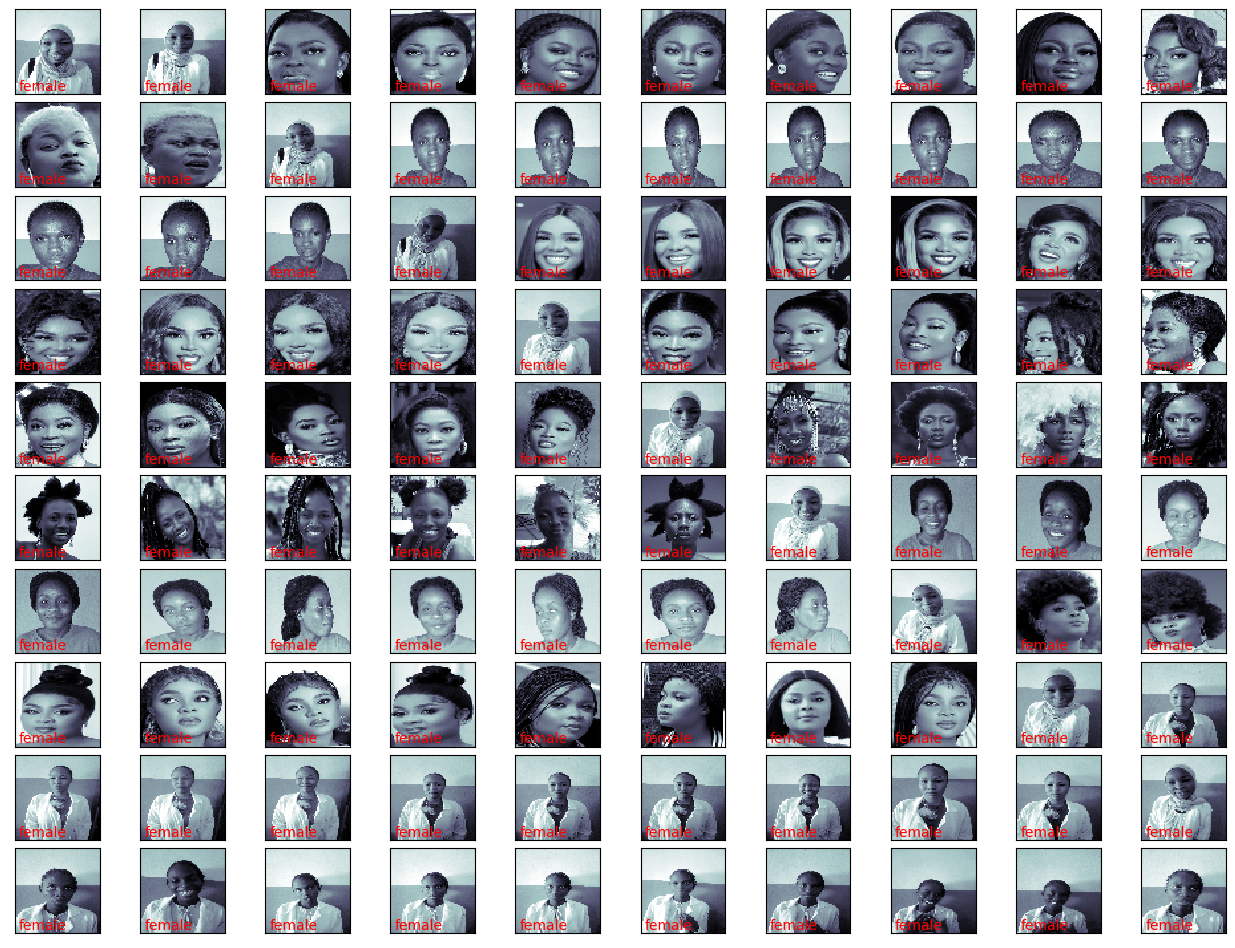

In [11]:
# Plot the images together with the names
fig, axes = plt.subplots(10, 10, figsize=(16, 12), subplot_kw={'xticks':[], 'yticks':[]}, 
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(face_id[i], cmap='bone', interpolation='nearest')
    ax.text(0.05, 0.05, str(name[i]),transform=ax.transAxes, color='red')

# Machine Learning

In [12]:
# Encode the names using label binarizer
from sklearn.preprocessing import LabelBinarizer
lab = LabelBinarizer()
lab.fit_transform(name)

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [13]:
lab.classes_

array(['female', 'male'], dtype='<U6')

In [14]:
# Split the data into training and testing set
X = images_array
Y = name

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Y_train, Y_test = train_test_split(X, Y, random_state=0, train_size=0.8)

In [15]:
#Using SVC method of svm class to use Kernel SVM Algorithm
from sklearn.svm import SVC
svc_rbf = SVC(kernel = 'rbf', random_state = 0)
svc_rbf.fit(Xtrain, Y_train)

SVC(random_state=0)

In [19]:
# Check for the accuracy of the model
print('Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(Xtrain, Y_train))

Support Vector Machine (RBF Classifier) Training Accuracy: 0.99375


In [20]:
#save the model
filename = 'gender_model.sav'
gender_model = pickle.dump(svc_rbf, open(filename, 'wb'))